# Quais Fatores Mais Causam Desligamentos no Ambiente de Trabalho?

Neste projeto serão analisados quais fatores mais possuem relação com o atrito no ambiente de trabalho.

O uso adequado das informações é algo poderoso para a tomada de decisões nas empresas.  Normalmente,  quanto melhor  é  a  análise  prévia  feita  pelo  gestor,  maiores  as chances de sucesso nas suas decisões. Em relação à gestão de pessoas, isso não é diferente e é por causa de tal questão que as empresas vêm buscando formas de mapear comportamentos e condições que influenciem positivamente o desempenho de seus colaboradores. 

In [628]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Importando os Dados

In [629]:
rh_data = pd.read_csv('dataset.csv')

In [630]:
rh_data.head(20)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,AgeStartedWorking
0,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
1,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
2,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
3,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
4,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
5,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
6,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
7,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
8,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
9,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,4,Female,3,...,3,21,2,3,5,0,0,2,Company Website,20


In [631]:
rh_data['Target'] = 0

a = rh_data[rh_data['Attrition']=='Current employee']

a['Target'] = 1

b = rh_data[rh_data['Attrition']!='Current employee']

b['Target'] = 0

frames = [a,b]

rh_data = pd.concat(frames,axis=0)

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [632]:
rh_data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,AgeStartedWorking,Target
18,49,Current employee,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,10,3,3,10,7,1,7,Seek,39,1
19,59,Current employee,Non-Travel,Human Resources,2,4,Human Resources,1,Male,2,...,10,3,3,10,7,1,7,Seek,49,1
20,59,Current employee,Non-Travel,Human Resources,2,4,Life Sciences,1,Male,2,...,10,3,3,10,7,1,7,Seek,49,1
21,49,Current employee,Travel_Frequently,Research & Development,8,1,Marketing,3,Male,2,...,10,3,3,10,7,1,7,Seek,39,1
22,49,Current employee,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,10,3,3,10,7,1,7,Seek,39,1
23,49,Current employee,Travel_Frequently,Research & Development,8,1,Marketing,3,Male,2,...,10,3,3,10,7,1,7,Seek,39,1
24,59,Current employee,Non-Travel,Human Resources,2,4,Human Resources,1,Male,2,...,10,3,3,10,7,1,7,Seek,49,1
25,59,Current employee,Non-Travel,Human Resources,2,4,Life Sciences,1,Male,2,...,16,3,2,14,8,6,9,Seek,43,1
26,49,Current employee,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,10,3,3,10,7,1,7,Seek,39,1
27,49,Current employee,Travel_Frequently,Research & Development,8,1,Life Sciences,2,Male,2,...,6,3,3,6,5,0,3,Indeed,43,1


In [633]:
rh_data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeStartedWorking,Target
count,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,...,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000
mean,37.035562,9.215413,2.914693,2.720054,2.730115,2.043846,2.724738,6415.708561,2.690693,15.215630,...,0.794431,11.074941,2.804016,2.761688,6.910053,4.200755,2.164238,4.091335,25.960621,0.840056
std,9.050759,8.106362,1.024470,1.094684,0.709159,1.089296,1.103915,4627.871795,2.499755,3.658836,...,0.850228,7.565958,1.289432,0.706891,5.969888,3.609138,3.200890,3.548117,9.384428,0.366563
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2900.250000,1.000000,12.000000,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,20.000000,1.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4898.000000,2.000000,14.000000,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,25.000000,1.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8120.000000,4.000000,18.000000,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,31.000000,1.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,...,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,60.000000,1.000000


In [634]:
rh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23058 entries, 18 to 23057
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       23058 non-null  int64 
 1   Attrition                 23058 non-null  object
 2   BusinessTravel            23058 non-null  object
 3   Department                23058 non-null  object
 4   DistanceFromHome          23058 non-null  int64 
 5   Education                 23058 non-null  int64 
 6   EducationField            23058 non-null  object
 7   EnvironmentSatisfaction   23058 non-null  int64 
 8   Gender                    23058 non-null  object
 9   JobInvolvement            23058 non-null  int64 
 10  JobLevel                  23058 non-null  int64 
 11  JobRole                   23058 non-null  object
 12  JobSatisfaction           23058 non-null  int64 
 13  MaritalStatus             23058 non-null  object
 14  MonthlyIncome        

## Engenharia de Atributos

Vamos transformar as variáveis em categóricas e inteiras:

In [635]:
rh_data1 = rh_data.select_dtypes(include=object).astype("category")

rh_data2 = rh_data.select_dtypes(include=int).astype("int64")

frames = [rh_data1,rh_data2]

rh_data = pd.concat(frames,axis=1)

rh_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23058 entries, 18 to 23057
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 23058 non-null  category
 1   BusinessTravel            23058 non-null  category
 2   Department                23058 non-null  category
 3   EducationField            23058 non-null  category
 4   Gender                    23058 non-null  category
 5   JobRole                   23058 non-null  category
 6   MaritalStatus             23058 non-null  category
 7   OverTime                  23058 non-null  category
 8   Employee Source           23058 non-null  category
 9   Age                       23058 non-null  int64   
 10  DistanceFromHome          23058 non-null  int64   
 11  Education                 23058 non-null  int64   
 12  EnvironmentSatisfaction   23058 non-null  int64   
 13  JobInvolvement            23058 non-null  int

Anos de Experiência de Trabalho Anteiores:

In [636]:
rh_data['PreviousWorkExperienceYears'] = rh_data.TotalWorkingYears.to_numpy() - rh_data.YearsAtCompany.to_numpy()

In [637]:
rh_data['PreviousWorkExperienceYears']

18       0
19       0
20       0
21       0
22       0
        ..
23029    8
23031    8
23034    8
23035    8
23057    5
Name: PreviousWorkExperienceYears, Length: 23058, dtype: int64

Anos de Estabilidade no Emprego:




In [638]:
rh_data['Stability'] = rh_data['PreviousWorkExperienceYears'].to_numpy() / rh_data['NumCompaniesWorked']

In [639]:
rh_data['Stability'] 

18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       0.000000
           ...   
23029    4.000000
23031    1.333333
23034    4.000000
23035    1.333333
23057    2.500000
Name: Stability, Length: 23058, dtype: float64

In [640]:
rh_data = rh_data.replace([np.inf, -np.inf], 0)

In [641]:
rh_data['Stability'] 

18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       0.000000
           ...   
23029    4.000000
23031    1.333333
23034    4.000000
23035    1.333333
23057    2.500000
Name: Stability, Length: 23058, dtype: float64

## Análise Exploratória

Text(0.5, 1.0, 'Histograma de Gênero')

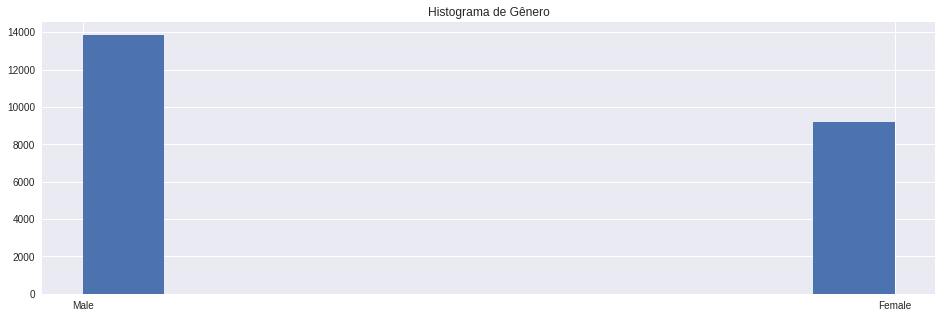

In [642]:
plt.figure(figsize=(16,5))
plt.hist(rh_data.Gender)
plt.title('Histograma de Gênero')

Como pode-se notar, o gênero masculino possui mais funcionários na empresa de onde os dados foram extraídos.

Text(0.5, 1.0, 'Curva de Densidade de Idade dos Funcionários')

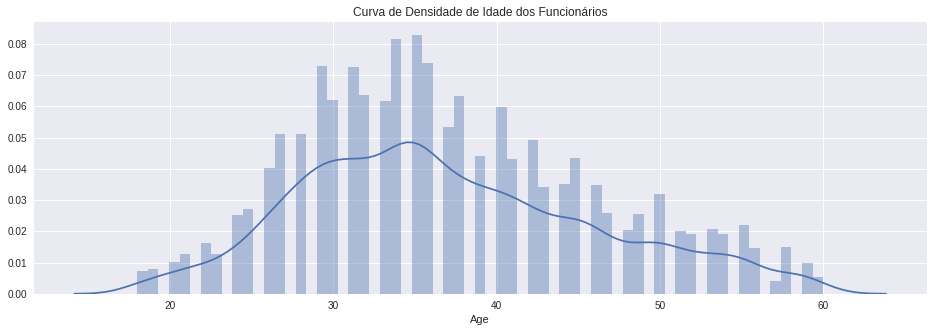

In [643]:
plt.figure(figsize=(16,5))
sns.distplot(rh_data['Age'], hist=True, kde=True,bins=65)
plt.title('Curva de Densidade de Idade dos Funcionários')


Text(0.5, 1.0, 'Boxplot de Idade dos Funcionários Masculinos')

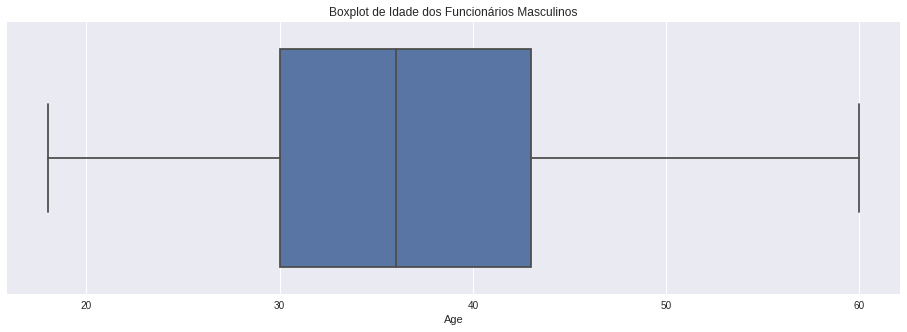

In [644]:
plt.figure(figsize=(16,5))
sns.boxplot(rh_data['Age'][rh_data['Gender']=='Male'])
plt.title('Boxplot de Idade dos Funcionários Masculinos')

Text(0.5, 1.0, 'Boxplot de Idade dos Funcionários Femininos')

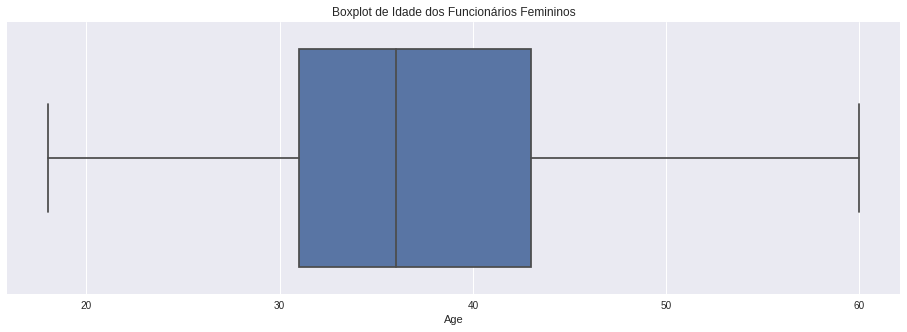

In [645]:
plt.figure(figsize=(16,5))
sns.boxplot(rh_data['Age'][rh_data['Gender']=='Female'])

plt.title('Boxplot de Idade dos Funcionários Femininos')

Pelos gráicos acima, nota-se que a média de idade dos funcionários é em torno de 35 anos, tanto para mulheres como para homens.

Text(0.5, 1.0, 'Histograma de Atrito')

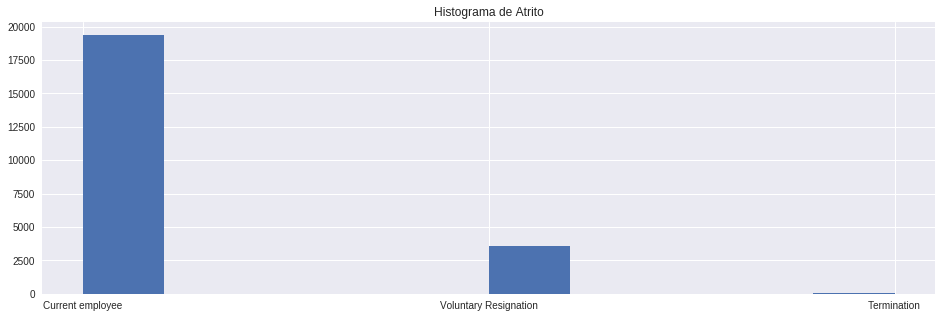

In [646]:
plt.figure(figsize=(16,5))
plt.hist(rh_data.Attrition)
plt.title('Histograma de Atrito')

A maioria dos empregados continuam empregados. A minoria foi demitida e uma pequena parcela pediu demissão voluntariamente.

Text(0.5, 1.0, 'Funcionários por Departamento')

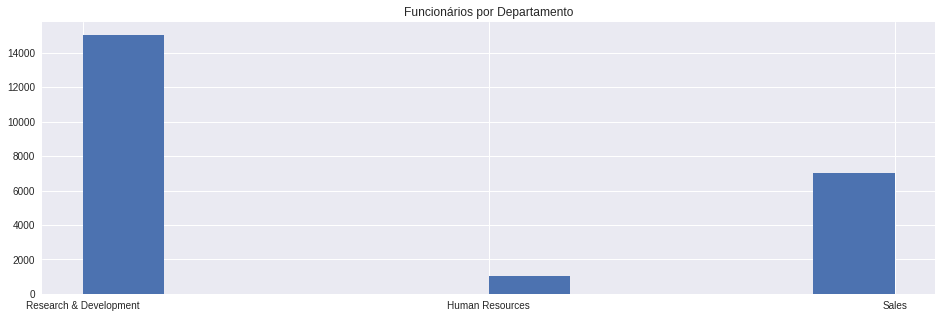

In [647]:
plt.figure(figsize=(16,5))
plt.hist(rh_data.Department)
plt.title('Funcionários por Departamento')

Text(0.5, 1.0, 'Funcionários por Departamento')

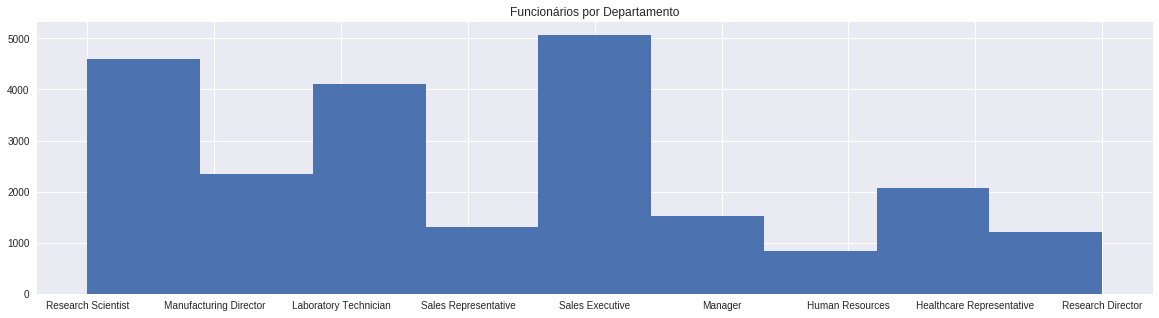

In [648]:
plt.figure(figsize=(20,5))
plt.hist(rh_data.JobRole,bins=len(np.unique(rh_data.JobRole)))
plt.title('Funcionários por Departamento')

As áreas de pesquisa e desenvolvimento, técnicos de laboratório e executivos de vendas são as que mais possuem funcionários.

Text(0.5, 1.0, 'Número de Funcionários por Área de Educação')

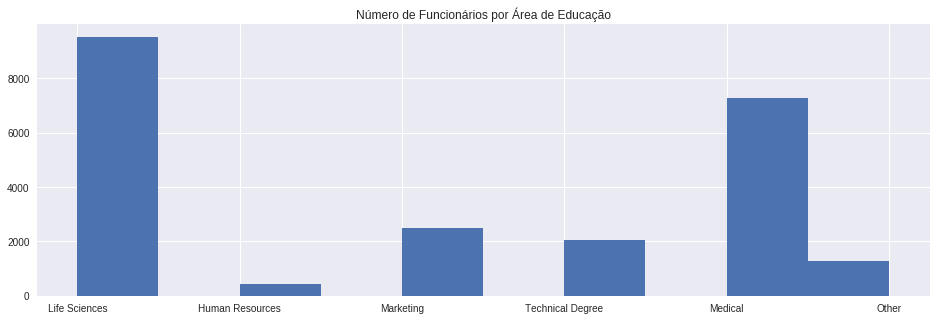

In [649]:
plt.figure(figsize=(16,5))
plt.hist(rh_data.EducationField)
plt.title('Número de Funcionários por Área de Educação')

Text(0.5, 1.0, 'Anos na Empresa')

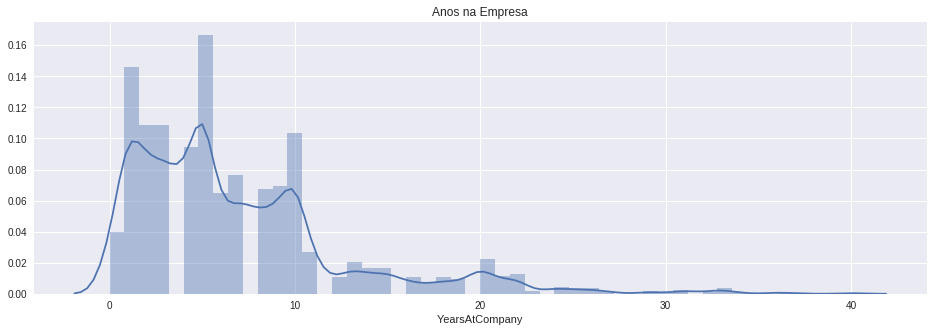

In [650]:
plt.figure(figsize=(16,5))
sns.distplot(rh_data['YearsAtCompany'], hist=True, kde=True)
plt.title('Anos na Empresa')


Text(0.5, 1.0, 'Anos Desde a Última Promoção')

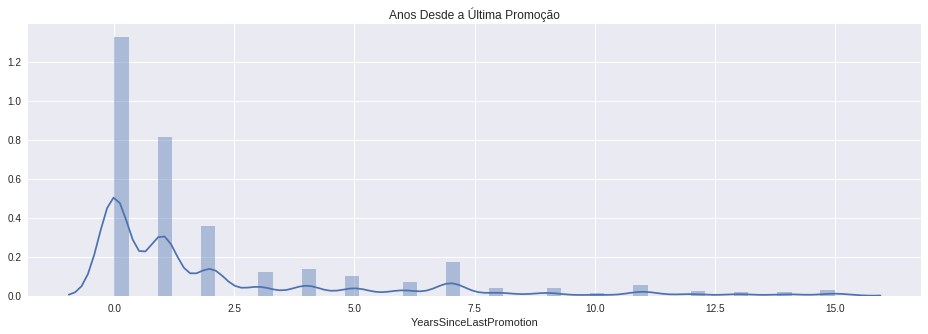

In [651]:
plt.figure(figsize=(16,5))
sns.distplot(rh_data['YearsSinceLastPromotion'], hist=True, kde=True)
plt.title('Anos Desde a Última Promoção')

In [652]:
print('Funcionários com Experiência Prévia Inferior a 1 ano:\n')
print(round(len(rh_data[rh_data['PreviousWorkExperienceYears']<1]) / len(rh_data['PreviousWorkExperienceYears']) * 100,2), '%\n')

print('Funcionários com Experiência Prévia Inferior a 3 anos:\n')
print(round(len(rh_data[rh_data['PreviousWorkExperienceYears']<3]) / len(rh_data['PreviousWorkExperienceYears']) * 100,2), '%\n')


print('Funcionários com Experiência Prévia Inferior a 5 anos:\n')
print(round(len(rh_data[rh_data['PreviousWorkExperienceYears']<5]) / len(rh_data['PreviousWorkExperienceYears']) * 100,2), '%\n')



print('Funcionários com Experiência Prévia Inferior a 7 anos:\n')
print(round(len(rh_data[rh_data['PreviousWorkExperienceYears']<7]) / len(rh_data['PreviousWorkExperienceYears']) * 100,2), '%\n')


Funcionários com Experiência Prévia Inferior a 1 ano:

32.47 %

Funcionários com Experiência Prévia Inferior a 3 anos:

58.28 %

Funcionários com Experiência Prévia Inferior a 5 anos:

70.85 %

Funcionários com Experiência Prévia Inferior a 7 anos:

79.52 %



58% dos funcionários possuem menos de 3 anos de experiência antes de entrar na empresa em questão. Este fato pode ser um dos ocasionadores de atrito, uma vez que o indivíduo apresenta pouca experiência de trabalho.

In [653]:
print('Porcentagem de Funcionários com Idade Inferior a 30 Anos:\n')
print(round(len(rh_data[rh_data['Age']<30]) / len(rh_data['Age']) * 100,2), '%\n')


Porcentagem de Funcionários com Idade Inferior a 30 Anos:

21.65 %



A base de funcionários não é tão jovem quanto esperado. As informações são conflitantes, uma vez que metade dos funcionários possuem experiência prévia de 3 anos, e apenas 22% possuem menos de 30 anos. 

In [654]:
print('Porcentagem de Funcionários com Graduação: ')
print(round(len(rh_data[rh_data['Education']==3]) / len(rh_data['Education']) * 100,2), '%\n')

print('Porcentagem de Funcionários com Mestrado: ')
print(round(len(rh_data[rh_data['Education']==4]) / len(rh_data['Education']) * 100,2), '%\n')

Porcentagem de Funcionários com Graduação: 
38.73 %

Porcentagem de Funcionários com Mestrado: 
27.23 %



O conflito anteriormente reportado pode ser solucionado pelo fato de que 27% dos funcionários possuem mestrado, ou seja, um fator que limita a experiência de trabalho prévia.

Text(0.5, 1.0, 'Satisfação no Trabalho vs Salário Mensal')

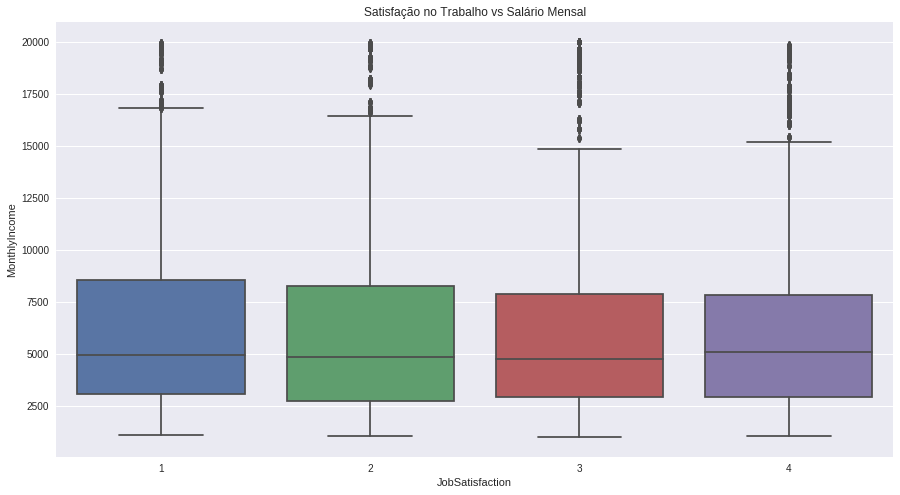

In [655]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='JobSatisfaction',y='MonthlyIncome')
plt.title('Satisfação no Trabalho vs Salário Mensal')


Não há evidências de que um salário mais alto aumente a satisfação do funcionario do trabalho.

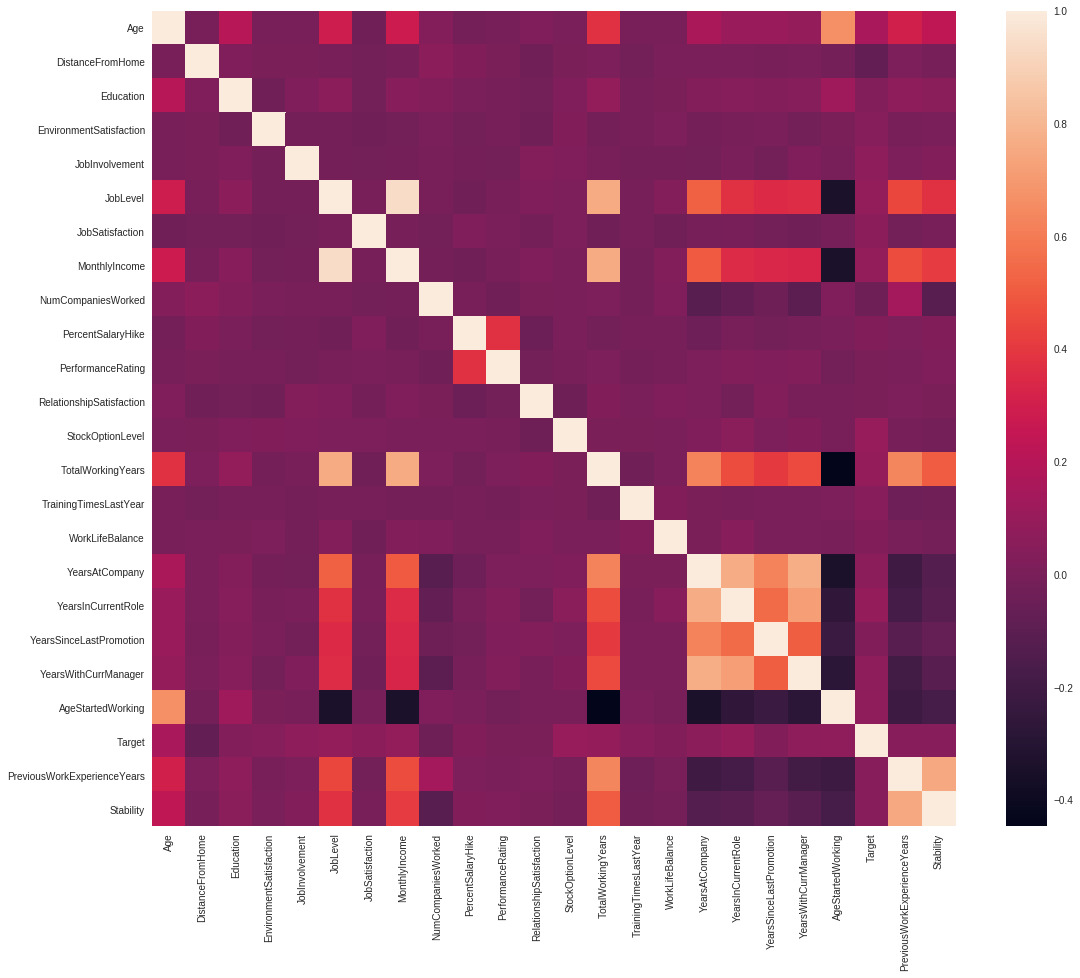

In [656]:
plt.figure(figsize=(18,15))
sns.heatmap(rh_data.corr())

No gráfico acima podemos notar uma correlação entre: Anos de Experiência e Nível de Emprego, Salário 

Text(0.5, 1.0, 'Gráfico de Dispersão: Anos na Empresa x Renda Mensal')

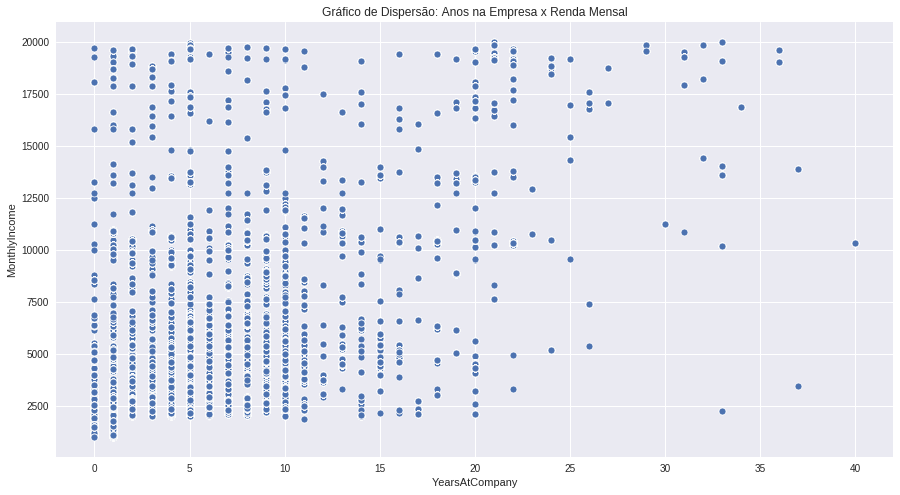

In [657]:
plt.figure(figsize=(15,8))
sns.scatterplot(rh_data['YearsAtCompany'],rh_data['MonthlyIncome'])
plt.title('Gráfico de Dispersão: Anos na Empresa x Renda Mensal')

Text(0.5, 1.0, 'Gráfico de Dispersão: Nível de Emprego x Renda Mensal')

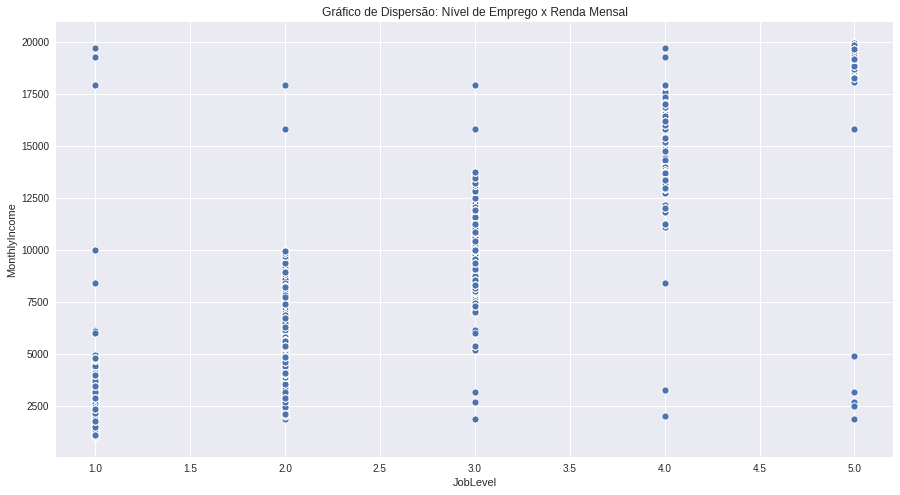

In [658]:
plt.figure(figsize=(15,8))
sns.scatterplot(rh_data['JobLevel'],rh_data['MonthlyIncome'])
plt.title('Gráfico de Dispersão: Nível de Emprego x Renda Mensal')

Text(0.5, 1.0, 'Satisfação no Trabalho vs Salário Mensal')

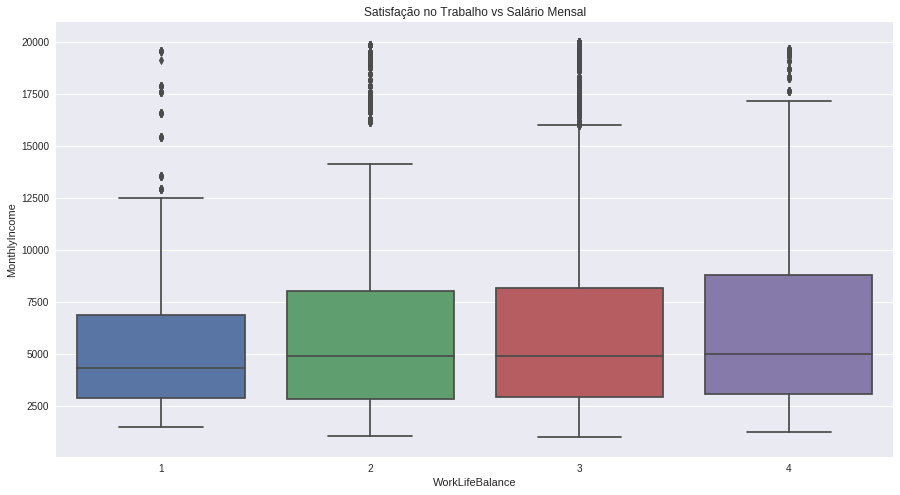

In [659]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='WorkLifeBalance',y='MonthlyIncome')
plt.title('Satisfação no Trabalho vs Salário Mensal')


Pelo gráfico acima, pode-se notar que pessoas com um maior nível de equilíbrio entre vida pessoal e trabalho possuem um maior salário mensal. Seria um fator interessante para ser analisado pelo RH.

Text(0.5, 1.0, 'Satisfação no Trabalho vs Salário Mensal')

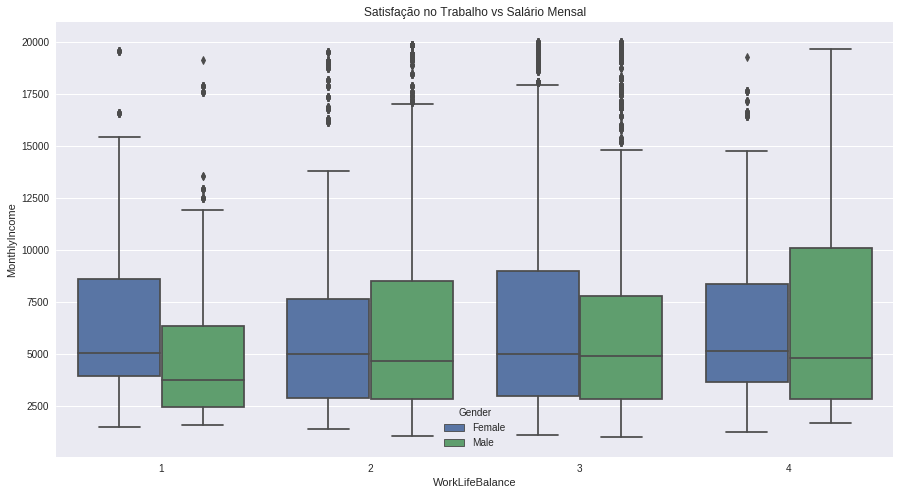

In [660]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='WorkLifeBalance',y='MonthlyIncome',hue='Gender')
plt.title('Satisfação no Trabalho vs Salário Mensal')


Text(0.5, 1.0, 'Anos na Empresa vs Salário Mensal')

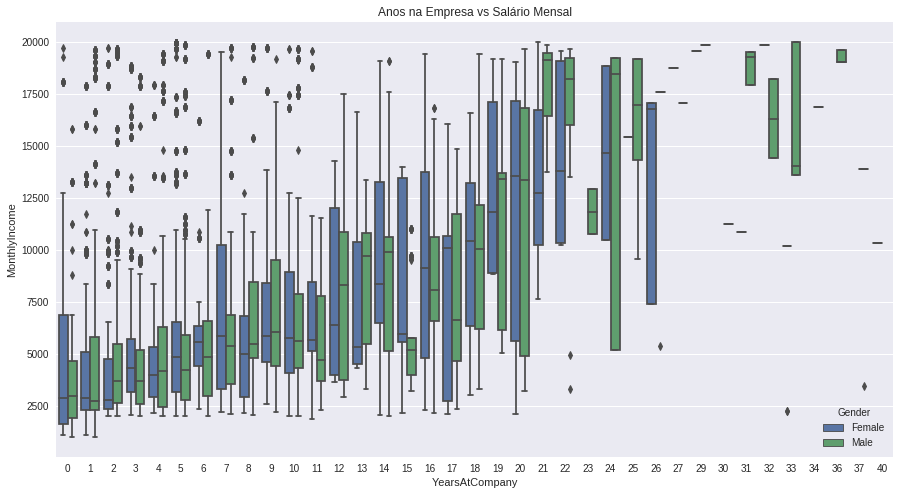

In [661]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='YearsAtCompany',y='MonthlyIncome',hue='Gender')
plt.title('Anos na Empresa vs Salário Mensal')


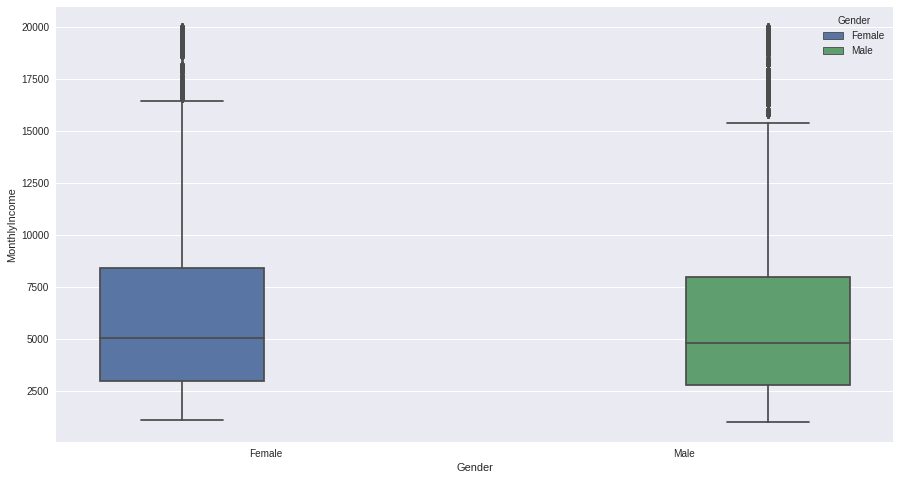

In [662]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='Gender',y='MonthlyIncome',hue='Gender')

Os gráficos acima não mostram nenhum tipo de discriminação de gênero na empresa em questão. Os salários e as tendências de evolução são similares para mulheres e homens.

Text(0.5, 1.0, 'Cargo x Salário Mensal')

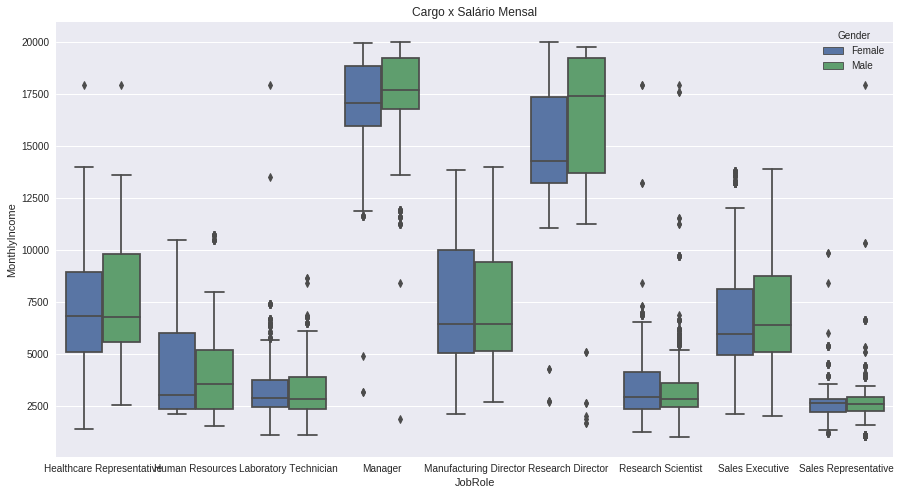

In [663]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='JobRole',y='MonthlyIncome', hue='Gender')
plt.title('Cargo x Salário Mensal')

No entanto, este gráfico revela que para cargos de gestão, como "Manager" ou "Research Director", homens tende a possuir um salário maior que o das mulheres.

Text(0.5, 1.0, 'Cargo x Anos de Experiência')

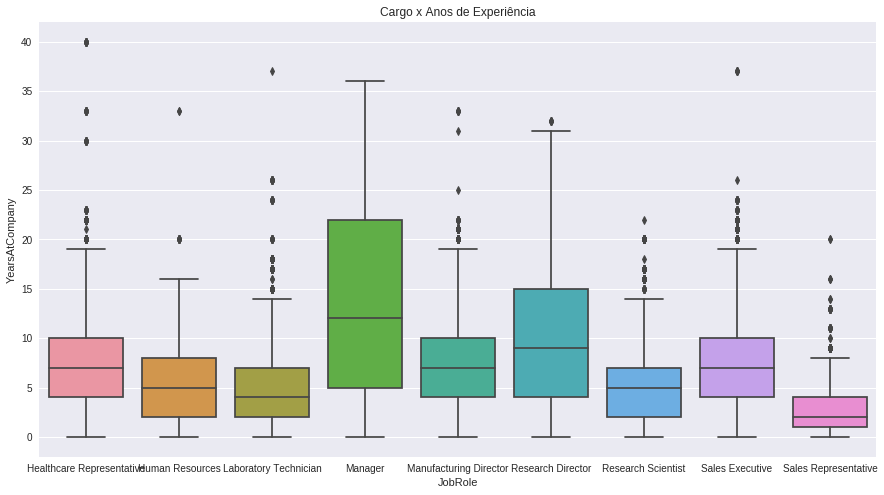

In [664]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='JobRole',y='YearsAtCompany')
plt.title('Cargo x Anos de Experiência')

Como era de se esperar, os gerentes são as pessoas que mais possuem anos de experiência na empresa. Nada de diferente do mundo real.

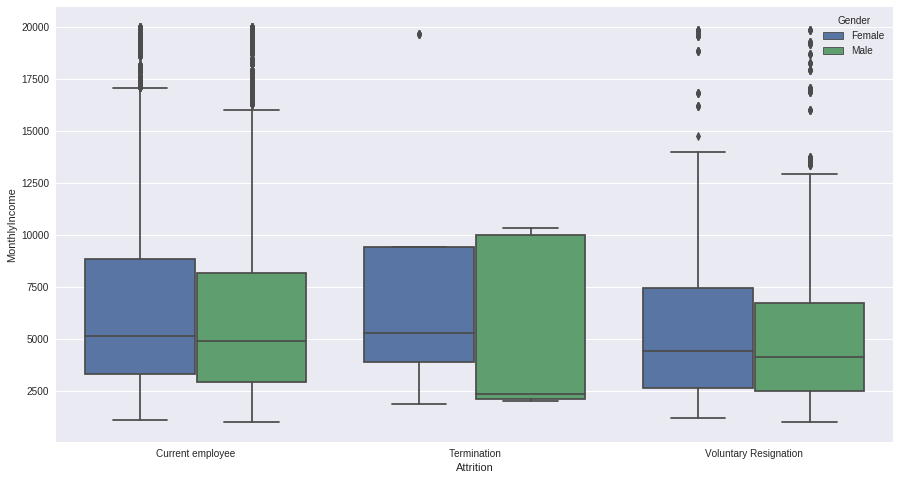

In [665]:
plt.figure(figsize=(15,8))
sns.boxplot(data=rh_data,x='Attrition',y='MonthlyIncome',hue='Gender')

Pela mediana das caixas, entende-se que pessoas que pedem demissão ganhavam menos que os funcionários que estão atualmente empregados. Um fator para tal pedido pode ser a busca por um melhor salário. Pessoas demitidas, principalmente do gênero masculino, tendem a ganhar bem menos que os demais casos.

## Modelagem

Vamos criar um modelo para auxiliar o RH a recrutar melhor e evitar atritos dentro da empresa.

In [666]:
from sklearn.model_selection import train_test_split

rh_data.dropna()

c = rh_data['Target'].copy()

rh_data = rh_data.drop(['Attrition','Target'],axis=1)

a = rh_data.select_dtypes(include=int).astype("int64")

b = pd.get_dummies(rh_data)


frames = [a,b,c]

rh_data_dummi = pd.concat(frames,axis=1)


In [671]:

rh_data_dummi.columns

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'AgeStartedWorking', 'PreviousWorkExperienceYears', 'Age',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'AgeStartedWorking', 'PreviousWorkExperienceYear

In [672]:
rh_data_dummi=rh_data_dummi.dropna()

X = rh_data_dummi.iloc[:,:-2].values

Y = rh_data_dummi['Target'].values

Text(0.5, 1.0, 'Quantidade de Classes: Desbalanceamento')

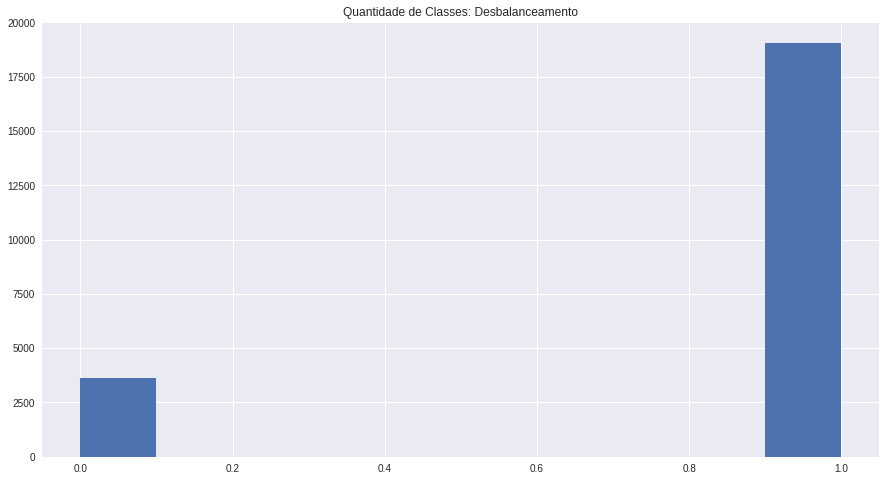

In [673]:
plt.figure(figsize=(15,8))
plt.hist(Y)
plt.title('Quantidade de Classes: Desbalanceamento')

Os dados das classes estão desbalanceados. Vamos considerar que os que pedem demissão e os demitidos são da mesma classe. Para tratar o desbalanceamento vamos realizar um undersampling na classe marjoritária. Casos com desbalanceamento são difíceis de se lidar, pois o undersampling causa perda de informação enquanto que o oversampling causa overfitting.

In [845]:
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=0.2)

x, y = under.fit_resample(X,Y) 

Text(0.5, 1.0, 'Quantidade de Classes: Desbalanceamento')

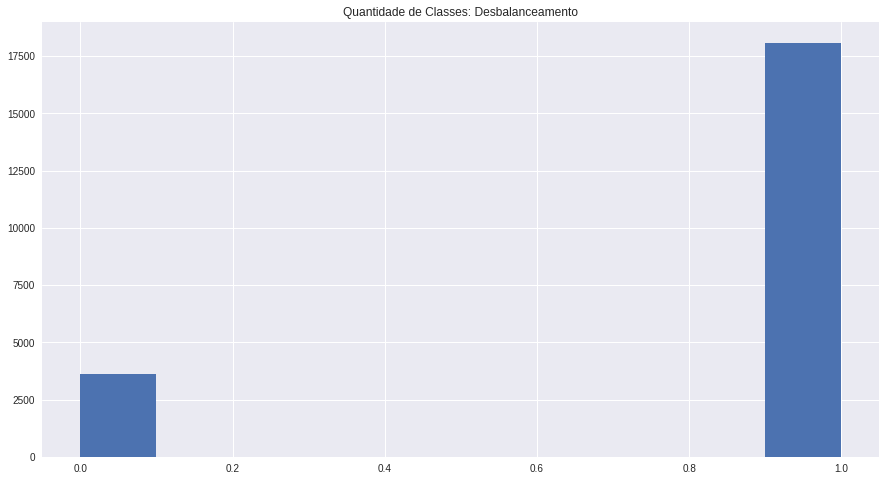

In [846]:
plt.figure(figsize=(15,8))
plt.hist(y)
plt.title('Quantidade de Classes: Desbalanceamento')

In [847]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y,shuffle=True,random_state=42)

In [848]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_estimators=3,max_depth=50)

scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='f1_macro')

print(scores)

print(np.mean(scores))

[0.96881007 0.96711852 0.96027167 0.95716279 0.96571673]
0.9638159571249467


In [849]:
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)
f1_score(y_test, ypred, average='macro')

0.9840940421585583

O modelo deve estar sobreajustado. Vamos realizar um 'pruning':

In [873]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=3,max_depth=25)

scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='f1_macro')
scores2 = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')

print('F1-Macro Médio de Treino (Cross-Validation):')
print(np.mean(scores),'\n')

print('Acurácia Média de Treino (Cross-Validation):')
print(np.mean(scores2),'\n')

rf = RandomForestClassifier(n_estimators=3,max_depth=13)
    
rf.fit(x_train,y_train)
    
ypred = rf.predict(x_test)

print('F1-Macro de Teste:')
print(f1_score(y_test, ypred, average='macro'),'\n')


print('Acurácia de Teste: ')
print(accuracy_score(y_test, ypred))


F1-Macro Médio de Treino (Cross-Validation):
0.9589974262953044 

Acurácia Média de Treino (Cross-Validation):
0.9801899926585704 

F1-Macro de Teste:
0.9370211654106015 

Acurácia de Teste: 
0.9670658682634731


Como o dataset é desbalanceado, deve-se tomar cuidado ao mensurar a performance do modelo através do score 'acurácia'. O score pode ser bom, no entanto, o modelo pode estar se saindo bem apenas na previsão da classe marjoritária. Recomenda-se utilizar, nestes casos, métricas de precisão e recall ou o f1-score, de forma a complementar a acurácia.

In [894]:
colunas = rh_data_dummi.iloc[:,:-2].columns

valor = rf.feature_importances_

func = {'coluna': colunas, 'importancia': valor}

func = pd.DataFrame(func)

func.head()

,coluna,importancia
0,Age,0.052955
1,DistanceFromHome,0.040802
2,Education,0.017028
3,EnvironmentSatisfaction,0.013344
4,JobInvolvement,0.005311


In [912]:
features = func.sort_values('importancia',ascending=False)[1:15]

#plt.figure(figsize=(18,15))
#plt.bar(colunas,valor)

Text(0.5, 1.0, 'Atributos Mais Importantes Para a Classificação')

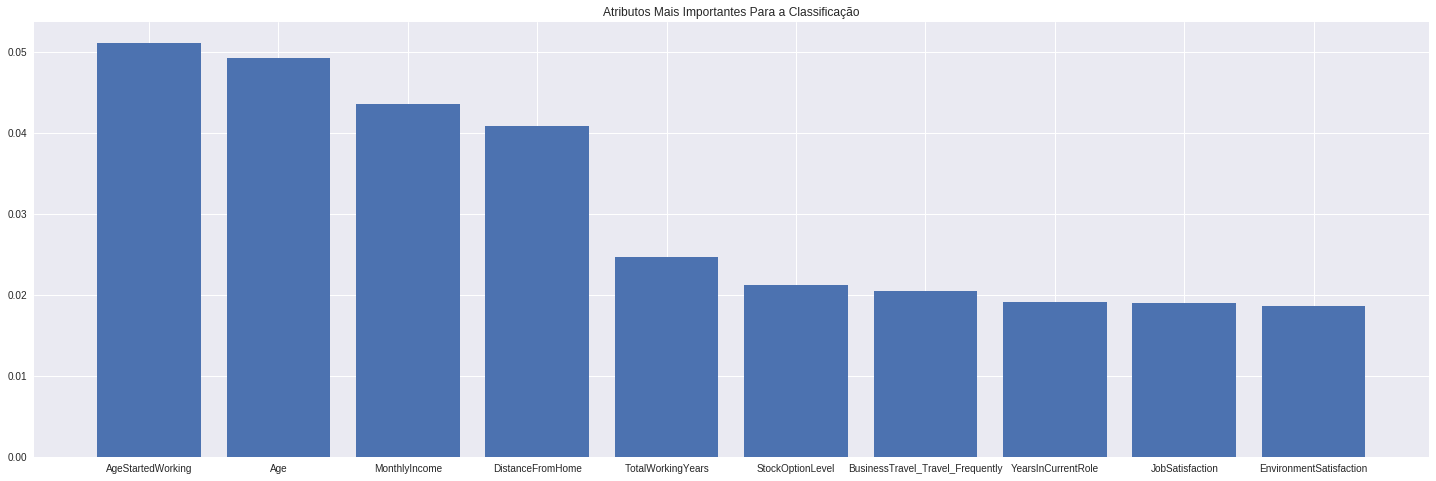

In [914]:
plt.figure(figsize=(25,8))
plt.bar(features['coluna'],features['importancia'])
plt.title('Atributos Mais Importantes Para a Classificação')

No gráfico acima podemos ver os atributos mais importantes para o algoritmo de classificação decidir se um funcionário pertence ou não ao grupo de funcionários que foram demitidos ou pediram demissão. O resultado é bem coerente, uma vez que a idade, o salário, a distância do trabalho até a casa, as viagens a trabalho, a estagnação em um cargo, e a satisfação do ambiente e do emprego, são fatores muito determinantes na permanência e no bom desempenho dos trabalhadores.